In [ ]:
# default_exp core

# Some Cairo Basics

> I plan on starting with some arty stuff, which means day 1 is me playing with cairo

In [ ]:
#hide
from days_of_code.core import *

This should be a chance to try out a drawing library and, importantly, figure out managing dependancies and such before Monday. I tried `sudo apt install libcairo2-dev pkg-config` but `pip install pycairo` still failed :/ Instead I did `pip install cairocffi` so I guess that's what I'm using. I added it to the requirements list in settings.ini.

Here's the first example I tried, which I export to core.py so that it can be used elsewhere. The main motivation here was to check that evreything works and to see how NBDev handles this sort of thing. You'll notice it hides the actual method by default, but gives the docstring.

In [ ]:
#export
import cairocffi as cairo
from IPython.display import Image, display

def hw_cairo(text):
    """ Write text as an angled line on a cairo ImageSurface and save to example.png, then display it."""
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 300, 200)
    context = cairo.Context(surface)
    with context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
    # Restore the default source which is black.
    context.move_to(90, 140)
    context.rotate(-0.5)
    context.set_font_size(20)
    context.show_text(text)
    surface.write_to_png('example.png')
    display(Image('example.png'))

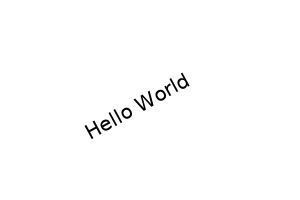

In [ ]:
#skiptest
hw_cairo('Hello World')

# Inter-conversions

I know I will want to work with inputs (image files, numpy arrays, PIL) and convert my cairo surfaces to numpy arrays to mess with them and then convert back, etc. So let's mess with that a little bit.

In [ ]:
#export 
import numpy as np
import PIL
def surface_to_npy(surface):
    """ Cairo ImageSurface to numpy array for inline display"""
    buf = surface.get_data()
    im = np.frombuffer(buf, dtype=np.uint8)
    h = surface.get_height()
    w = surface.get_width()
    im = np.reshape(im, [h, w, 4])
    # swap axis to get r-g-b-alpha
    im = im[:, :, [2, 1, 0, 3]]
    return im

Creating a surface to mess with:

In [ ]:
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 100) # Creating a surface to play with
context = cairo.Context(surface)
context.set_source_rgb(0, 1, 0)  # green
context.move_to(50, 50)
context.show_text('Hello World')

Viewing with matplotlib

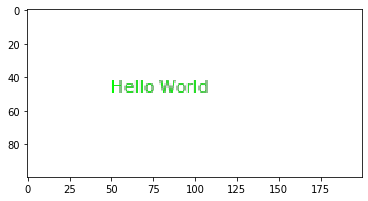

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(surface_to_npy(surface))

A nicer way to view the image without the matplotlib axes is to using PIL and IPython's display. We might as well make a surface_to_PIL function and a display_surface function since we will want to do this a lot.

In [ ]:
#export
def surface_to_PIL(surface):
    return PIL.Image.fromarray(surface_to_npy(surface))

def display_surface(surface):
    display(surface_to_PIL(surface))

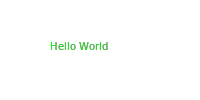

In [ ]:
display_surface(surface)

# Animation

I like to watch things as they happen. ipywidgets should make for fun animations.

In [ ]:
import ipywidgets as widgets

# Set up surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 100) # Creating a surface to play with
context = cairo.Context(surface)

imw = widgets.Image(
    value=surface.write_to_png(),
    format='png',
    width=300,
    height=400,
)
display(imw)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xc8\x00\x00\x00d\x08\x06\x00\x00\x00\xc3\x86\x7f…

In [ ]:
import time
for i in range(10):
    context.set_source_rgb(0, 1, i/10)  # green
    context.move_to(50, 50+i*5)
    context.show_text(f'Hello {i}')
    imw.value = surface.write_to_png()
    time.sleep(0.1)

We first make out blank canvas and display that. Whenever we want to update the image, we simply modify the value of the widget. A neat trick here is that `surface.write_to_png()` returns an io.BytesIO thingee if we don't specify a target, which we can pass straight to the widget (before I was messing about trying to get this same thing to happen the long way around). This is pretty neat - we can set up a surface and then occasionally draw to it when we want to see updates. Let's demonstrate this with an example drawing a crazy amount of rectangles:

In [ ]:
# skiptest
import random

# Set up surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 600, 400) # Creating a surface to play with
context = cairo.Context(surface)

imw = widgets.Image(
    value=surface.write_to_png(),
    format='png',
    width=600,
    height=400,
)
display(imw)

for i in range(100000):
    context.set_source_rgba(0.6, i/1e4, 1-i/1e5, 1-i/1e5)
    x, y = random.random()*600, random.random()*400
    context.rectangle(x, y, 2, 2)
    context.fill()
    if i%1e4 == 0: # Change this to alter the number of updates (this affects the speed of the loop)
        imw.value = surface.write_to_png()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x01\x90\x08\x06\x00\x00\x00r5\x1e\x98\x…

# Conclusions

That's an hour of mostly logistics, but at the end of it we have easy ways to play with cairo in Jupyter, including converting surfaces to arrays, displaying them and, most satisfying, a good fast way to render animations for our viewing pleasure. Tomorrow I hope to start the actual fun stuff.

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script() # To save doing this on the command line

Converted 00_core.ipynb.
Converted 01_Cairo_Hello.ipynb.
Converted index.ipynb.
